In [1]:
import os
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.patches as patches

In [2]:
def get_bbox_dims(labels_path):
    ws, hs = [], []
    with open(labels_path, "r", encoding="utf-8") as label_file:
            label_file.readline()
            for line in label_file.readlines():
                ix, x1, y1, w, h = [a for a in line.split(",")]
                ws.append(float(w))
                hs.append(float(h))
    return ws, hs
                

In [3]:
ws, hs = get_bbox_dims('/Users/reza/Career/DMLab/AR TRACKING/ar-track/data/AR-MOT/labels.csv')

In [4]:
mean_w, mean_h = np.mean(ws), np.mean(hs)

In [5]:
dim = max(mean_w, mean_h)

In [6]:
scaled_dim = dim / 4096

In [7]:
scaled_dim

0.08294289077405795

In [8]:
def crop_and_show_ar(images_path, labels_path, new_size=1024, old_size=4096):
    i, ix = 1, 1
    real_dim = int(scaled_dim * 1024)
    half_dim = real_dim // 2
    with open(labels_path, "r", encoding="utf-8") as label_file:
        label_file.readline()
        line = label_file.readline()
        while ix != 4:
            image_name = str(i).zfill(6) + ".jpg"
            image_path = os.path.join(images_path, image_name)
            image = (
                np.array(
                    Image.open(image_path).resize((new_size, new_size)),
                    dtype=np.float32,
                )
                / 255.0
            )
            fig, ax = plt.subplots(1, figsize=(10, 10))
            ax.axis("off")
            fig.patch.set_visible(False)
            ax.imshow(image, cmap="gray")
            while line:
                ix, x1, y1, w, h = [a for a in line.split(",")]
                ix = int(ix)
                x1, y1, w, h = [float(a) / old_size for a in [x1, y1, w, h]]
                xx1, yy1 = int(x1 * new_size), int(y1 * new_size)
                xx, yy = int(xx1 + w * new_size / 2), int(yy1 + h * new_size/ 2)
                plt.scatter(xx, yy, cmap='PiYG')
                # plt.imshow(image[y-half_dim:y+half_dim, x-half_dim:x+half_dim], cmap='gray')
                # plt.show()
                rect = patches.Rectangle(
                    (xx - half_dim, yy - half_dim),
                    real_dim,
                    real_dim,
                    linewidth=2,
                    edgecolor='red',
                    facecolor="none",
                )
                ax.add_patch(rect)
                rect2 = patches.Rectangle(
                    (xx1, yy1),
                    w * new_size,
                    h * new_size,
                    linewidth=2,
                    edgecolor='green',
                    facecolor="none",
                )
                ax.add_patch(rect2)
                if ix != i:
                    plt.show()
                    i += 1
                    break
                line = label_file.readline()

/var/folders/bv/7h0f0hns2y72yqgg3ww8qkkm0000gn/T/ipykernel_4393/862780444.py:28: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(xx, yy, cmap='PiYG')


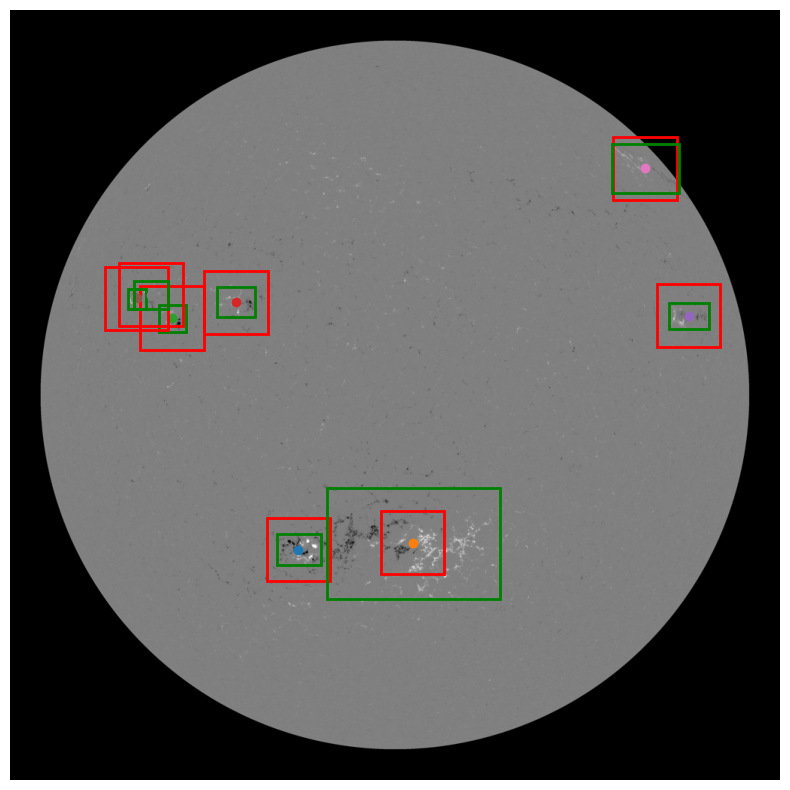

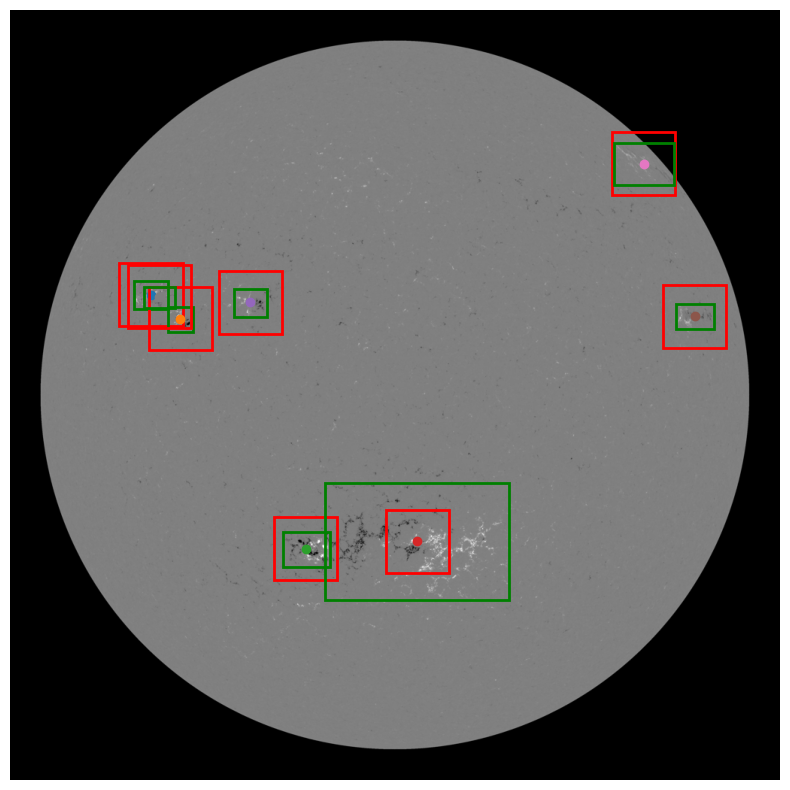

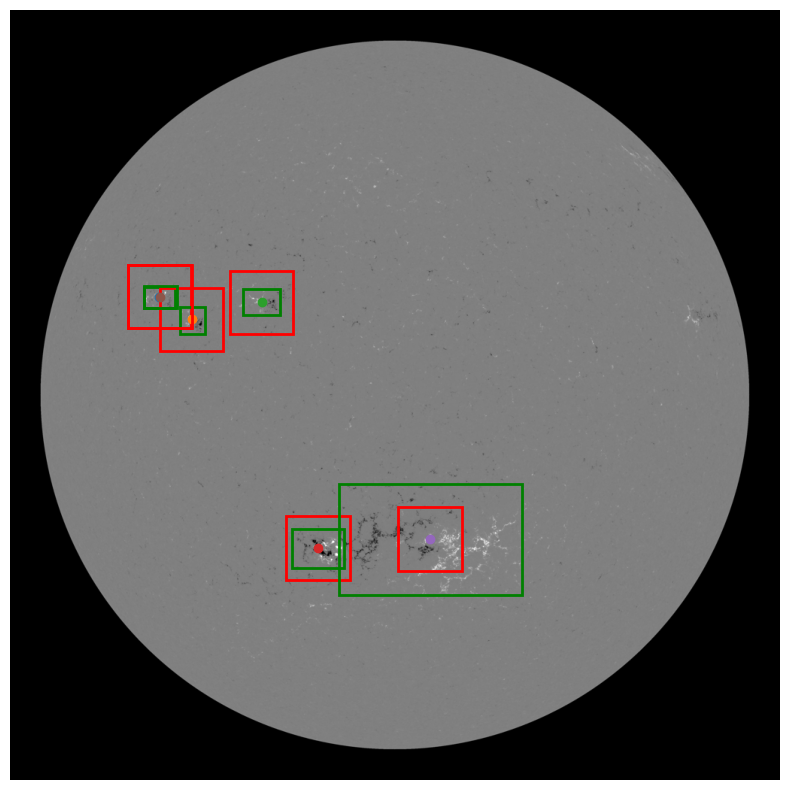

In [9]:
crop_and_show_ar('/Users/reza/Career/DMLab/AR TRACKING/ar-track/data/AR-MOT/images', '/Users/reza/Career/DMLab/AR TRACKING/ar-track/data/AR-MOT/labels.csv')

In [10]:
from utils import Dataset

In [11]:
dataset = Dataset('/Users/reza/Career/DMLab/AR TRACKING/ar-track/data/AR-MOT/images', '/Users/reza/Career/DMLab/AR TRACKING/ar-track/data/AR-MOT/labels copy.csv')

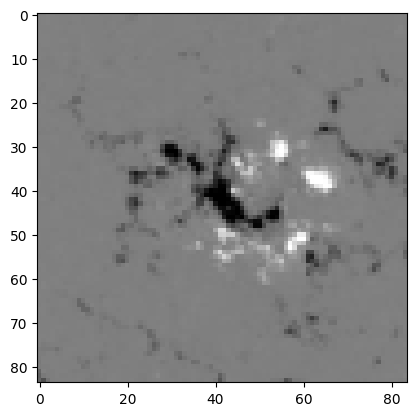

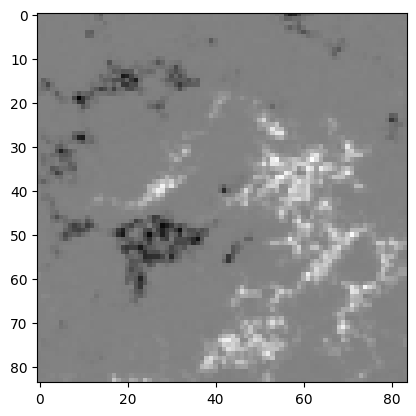

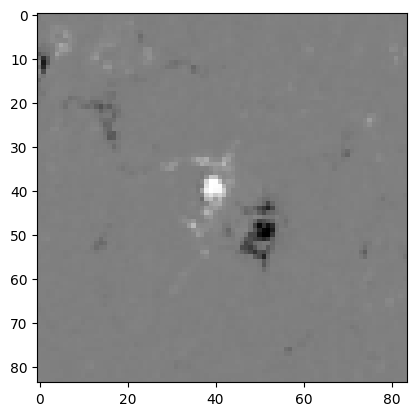

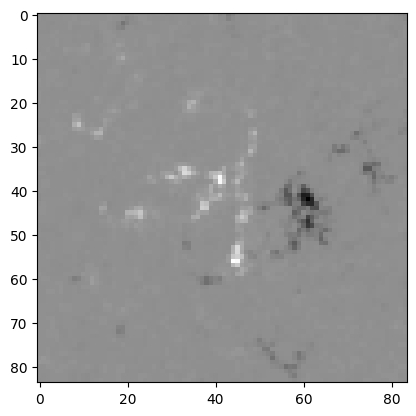

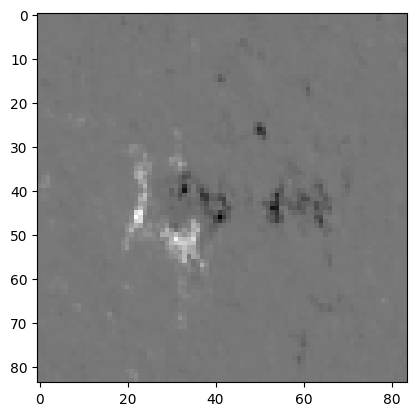

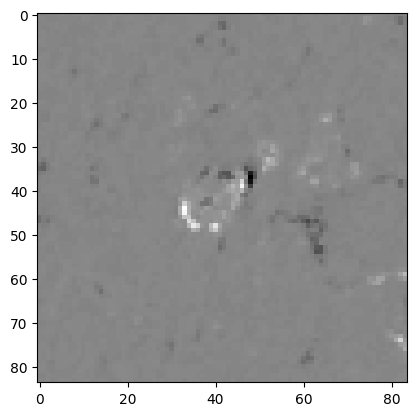

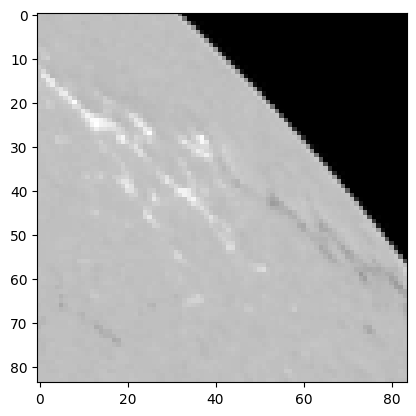

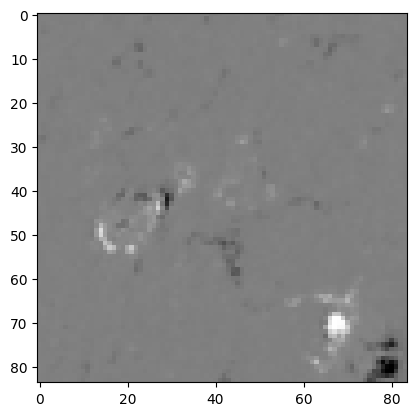

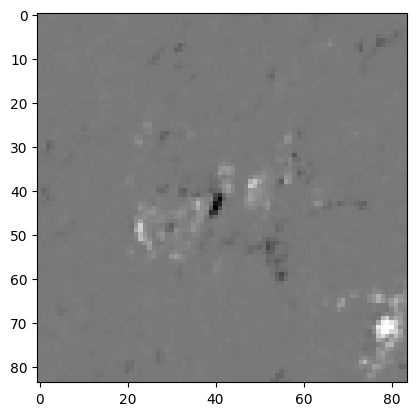

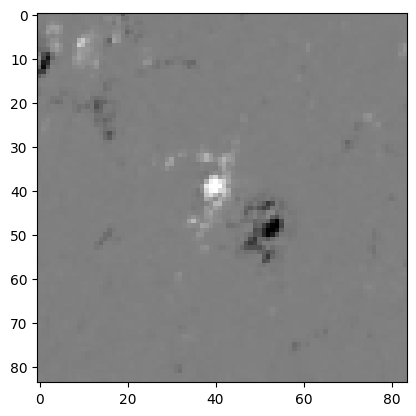

In [13]:
for i in range(10):
    x, _ = dataset[i]
    plt.imshow(x, cmap='gray')
    plt.show()